In [2]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [3]:
%sql postgresql://appdev@data:5432/appdev

'Connected: appdev@appdev'

In [216]:
%sql SELECT * from geonames LIMIT 1;

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
3038871,Obac de la Vall,1.50498,42.46602,T,SLP,AD,06,None,0,None,Europe/Andorra


1. > A. Find the tuple with the largest population

In [14]:
%sql SELECT * from geonames WHERE population in (SELECT MAX(population) from geonames);

1 rows affected.


geonameid,name,longitude,latitude,feature_class,feature_code,country_code,admin1_code,admin2_code,population,elevation,timezone
305104,Levant,36.0,34.0,L,RGN,None,None,None,44990000,None,Asia/Beirut


> B. Now calculate the distance from all locations to the tuple above using the <-> function

In [15]:
%%sql
CREATE VIEW max_pop as
SELECT * from geonames WHERE population in (SELECT MAX(population) from geonames);

Done.


[]

In [46]:
%%sql 
SELECT max_pop.name as "from", geonames.name as "to",  
point(max_pop.latitude, max_pop.longitude)
<->
point(geonames.latitude, geonames.longitude) 
as "distance"
from geonames, max_pop LIMIT 10;

10 rows affected.


from,to,distance
Levant,Obac de la Vall,35.5187260391022
Levant,Canal del Teixó,35.5403912827645
Levant,Solana del Soriguer,35.4976906065648
Levant,Bosc de Sant Romà,35.5211340049413
Levant,Sant Esteve,35.5230848613757
Levant,Canal de Rudielles,35.5756544866359
Levant,Estany Rodó,35.3803392045427
Levant,Torrent de Ribassols,35.5686877257961
Levant,Serra Plana,35.4524960679527
Levant,Coll de la Plana,35.5086914894509


> C. Now calculate the distance from all locations to the tuple above using the haversine distance

In [47]:
%%sql 
CREATE OR REPLACE FUNCTION public.geodistance(alat double precision, alng double precision, blat double precision, blng double precision)
  RETURNS double precision AS
$BODY$
SELECT asin(
  sqrt(
    sin(radians($3-$1)/2)^2 +
    sin(radians($4-$2)/2)^2 *
    cos(radians($1)) *
    cos(radians($3))
  )
) * 7926.3352 AS distance;
$BODY$
  LANGUAGE sql IMMUTABLE
COST 100;

Done.


[]

In [52]:
%%sql
SELECT 
max_pop.name as "from", geonames.name as "to", 
public.geodistance(max_pop.latitude, max_pop.longitude, geonames.latitude, geonames.longitude) as "haversine distance"
from geonames, max_pop LIMIT 10;

10 rows affected.


from,to,haversine distance
Levant,Obac de la Vall,1948.31948131202
Levant,Canal del Teixó,1948.97544410187
Levant,Solana del Soriguer,1946.67835552112
Levant,Bosc de Sant Romà,1948.51401122396
Levant,Sant Esteve,1948.68370586011
Levant,Canal de Rudielles,1951.17402268074
Levant,Estany Rodó,1940.93606757186
Levant,Torrent de Ribassols,1950.34910315871
Levant,Serra Plana,1944.25406670841
Levant,Coll de la Plana,1947.84095795632


> D. Plot the latitude and longitude of the largest 1000 populations on a 2-D scatter plot

In [80]:
import pandas as pd
df = pd.read_csv('http://www.stat.ubc.ca/~jenny/notOcto/STAT545A/examples/gapminder/data/gapminderDataFiveYear.txt', sep='\t')

In [211]:
result = %sql SELECT latitude, longitude from geonames ORDER BY population DESC LIMIT 1000;

1000 rows affected.


In [212]:
df = pd.DataFrame(result, columns=['a', 'b'])

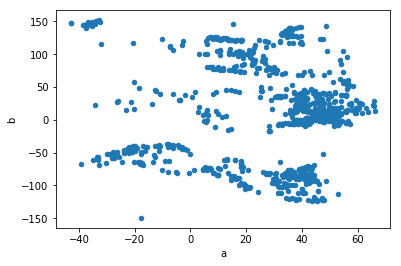

In [213]:
df.plot.scatter(x='a', y='b');

In [120]:
%sql SELECT COUNT(*) from geonames LIMIT 100;

1 rows affected.


count
115071


    2. A. Find all the cards that is made by Rob Alexander

In [126]:
%sql SELECT * from cards LIMIT 10;

10 rows affected.


set,data
10E,"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
10E,"{'id': '0fb7efcdacb0ac4c73829aa08ddee55feeadb56f', 'cmc': 5, 'name': 'Angel of Mercy', 'text': 'Flying\nWhen Angel of Mercy enters the battlefield, you gain 3 life.', 'type': 'Creature — Angel', 'power': '3', 'types': ['Creature'], 'artist': 'Volkan Baga', 'colors': ['White'], 'flavor': 'Every tear shed is a drop of immortality.', 'layout': 'normal', 'number': '2', 'rarity': 'Uncommon', 'manaCost': '{4}{W}', 'subtypes': ['Angel'], 'imageName': 'angel of mercy', 'mciNumber': '2', 'toughness': '3', 'multiverseid': 129465, 'colorIdentity': ['W']}"
10E,"{'id': '0b307d9f2d99b37aa659cf6708b7747d973b6107', 'cmc': 3, 'name': 'Angelic Blessing', 'text': ""Target creature gets +3/+3 and gains flying until end of turn. (It can't be blocked except by creatures with flying or reach.)"", 'type': 'Sorcery', 'types': ['Sorcery'], 'artist': 'Mark Zug', 'colors': ['White'], 'flavor': 'Only the warrior who can admit mortal weakness will be bolstered by immortal strength.', 'layout': 'normal', 'number': '3', 'rarity': 'Common', 'manaCost': '{2}{W}', 'imageName': 'angelic blessing', 'mciNumber': '3', 'multiverseid': 129711, 'colorIdentity': ['W']}"
10E,"{'id': '34b67f8cf8651964995bfec268498082710d4c6a', 'cmc': 5, 'name': 'Angelic Chorus', 'text': 'Whenever a creature enters the battlefield under your control, you gain life equal to its toughness.', 'type': 'Enchantment', 'types': ['Enchantment'], 'artist': 'Jim Murray', 'colors': ['White'], 'flavor': 'The harmony of the glorious is a dirge to the wicked.', 'layout': 'normal', 'number': '4', 'rarity': 'Rare', 'manaCost': '{3}{W}{W}', 'imageName': 'angelic chorus', 'mciNumber': '4', 'multiverseid': 129710, 'colorIdentity': ['W']}"
10E,"{'id': 'bf37b84059fe240e735e7bef03996bd32869947e', 'cmc': 2, 'name': 'Angelic Wall', 'text': ""Defender (This creature can't attack.)\nFlying"", 'type': 'Creature — Wall', 'power': '0', 'types': ['Creature'], 'artist': 'John Avon', 'colors': ['White'], 'flavor': '""The Ancestor protects us in ways we can\'t begin to comprehend.""\n—Mystic elder', 'layout': 'normal', 'number': '5', 'rarity': 'Common', 'manaCost': '{1}{W}', 'subtypes': ['Wall'], 'imageName': 'angelic wall', 'mciNumber': '5', 'toughness': '4', 'multiverseid': 129671, 'colorIdentity': ['W']}"
10E,"{'id': '28cf1fc88c72512df98530439d45d64f441546b5', 'cmc': 3, 'name': 'Aura of Silence', 'text': 'Artifact and enchantment spells your opponents cast cost {2} more to cast.\nSacrifice Aura of Silence: Destroy target artifact or enchantment.', 'type': 'Enchantment', 'types': ['Enchantment'], 'artist': 'D. Alexander Gregory', 'colors': ['White'], 'flavor': 'Not all silences are easily broken.', 'layout': 'normal', 'number': '6', 'rarity': 'Uncommon', 'manaCost': '{1}{W}{W}', 'imageName': 'aura of silence', 'mciNumber': '6', 'multiverseid': 132127, 'colorIdentity': ['W']}"
10E,"{'id': 'c192224e04e5e4a4b4c9b7e294e634c9f67e6d8a', 'cmc': 4, 'name': 'Aven Cloudchaser', 'text': ""Flying (This creature can't be blocked except by creatures with flying or reach.)\nWhen Aven Cloudchaser enters the battlefield, destroy target enchantment."", 'type': 'Creature — Bird Soldier', 'power': '2', 'types': ['Creature'], 'artist': 'Justin Sweet', 'colors': ['White'], 'flavor': '""At the Reapportionment, Eagle begged to be human. The 

In [128]:
%sql SELECT * from cards WHERE data @> '{"artist": "Rob Alexander"}' LIMIT 10;

10 rows affected.


set,data
10E,"{'id': '4a7bf234af44e07d9a159d4d89e96ce320919917', 'cmc': 6, 'name': 'Beacon of Immortality', 'text': ""Double target player's life total. Shuffle Beacon of Immortality into its owner's library."", 'type': 'Instant', 'types': ['Instant'], 'artist': 'Rob Alexander', 'colors': ['White'], 'flavor': 'The cave floods with light. A thousand rays shine forth and meld into one.', 'layout': 'normal', 'number': '10', 'rarity': 'Rare', 'manaCost': '{5}{W}', 'imageName': 'beacon of immortality', 'mciNumber': '10', 'multiverseid': 130553, 'colorIdentity': ['W']}"
10E,"{'id': '9cea331c080c3bbc7987c6560f65e39e9d1ed34f', 'cmc': 5, 'name': 'Kavu Climber', 'text': 'When Kavu Climber enters the battlefield, draw a card.', 'type': 'Creature — Kavu', 'power': '3', 'types': ['Creature'], 'artist': 'Rob Alexander', 'colors': ['Green'], 'flavor': '""There was a crack of branches, a rustle of leaves, then a tremendous roar. Our party had no chance as death descended from above.""\n—Taseen, elvish bard', 'layout': 'normal', 'number': '273', 'rarity': 'Common', 'manaCost': '{3}{G}{G}', 'subtypes': ['Kavu'], 'imageName': 'kavu climber', 'mciNumber': '273', 'toughness': '3', 'multiverseid': 129511, 'colorIdentity': ['G']}"
10E,"{'id': '28cc7c79cca8939fd9661f7abfc6ca453715b75e', 'cmc': 0, 'name': 'Llanowar Wastes', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {G} to your mana pool. Llanowar Wastes deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '355', 'rarity': 'Rare', 'imageName': 'llanowar wastes', 'mciNumber': '355', 'multiverseid': 129627, 'colorIdentity': ['B', 'G']}"
10E,"{'id': '7a90b7ba6197f8774ed99ecf75ac9abb3e0c0f20', 'cmc': 0, 'name': 'Shivan Reef', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {U} or {R} to your mana pool. Shivan Reef deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '357', 'rarity': 'Rare', 'imageName': 'shivan reef', 'mciNumber': '357', 'multiverseid': 129731, 'colorIdentity': ['U', 'R']}"
10E,"{'id': '8d1035f151615c949d0645b70fe01d8ab4a3f796', 'cmc': 0, 'name': 'Sulfurous Springs', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {R} to your mana pool. Sulfurous Springs deals 1 damage to you.', 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '359', 'rarity': 'Rare', 'imageName': 'sulfurous springs', 'mciNumber': '359', 'multiverseid': 129751, 'colorIdentity': ['B', 'R']}"
10E,"{'id': 'c97103ab834aad9b3fb7d07c4fb563089f97fe87', 'cmc': 0, 'name': 'Treetop Village', 'text': ""Treetop Village enters the battlefield tapped.\n{T}: Add {G} to your mana pool.\n{1}{G}: Treetop Village becomes a 3/3 green Ape creature with trample until end of turn. It's still a land. (If it would assign enough damage to its blockers to destroy them, you may have it assign the rest of its damage to defending player or planeswalker.)"", 'type': 'Land', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '361', 'rarity': 'Uncommon', 'imageName': 'treetop village', 'mciNumber': '361', 'multiverseid': 106455, 'colorIdentity': ['G']}"
10E,"{'id': '24a47bf9cb4596246501294e7127bf74e082bc1d', 'cmc': 0, 'name': 'Plains', 'type': 'Basic Land — Plains', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '364', 'rarity': 'Basic Land', 'subtypes': ['Plains'], 'imageName': 'plains1', 'watermark': 'White', 'supertypes': ['Basic'], 'variations': [129682, 129683, 129681], 'multiverseid': 129680, 'colorIdentity': ['W']}"
10E,"{'id': 'be5e30798e4f8b9b6f6e6a8dd2e30bf86bb04b94', 'cmc': 0, 'name': 'Forest', 'type': 'Basic Land — Forest', 'types': ['Land'], 'artist': 'Rob Alexander', 'layout': 'normal', 'number': '382', 'rarity': 'Basic Land', 'subtypes': ['Forest'], 'imageName': 'forest3', 'watermark': 'Green', 'supertypes': ['Basic'], 'variations': [129559, 129562, 129560], 'multiverseid': 129561, 'colorIde

In [218]:
%sql SELECT COUNT(*) from cards WHERE data @> '{"artist": "Rob Alexander"}';

1 rows affected.


count
401


> B. Find all the cards that have the subtype "Human"

In [134]:
%sql SELECT COUNT(*) from cards WHERE data @> '{"subtypes":["Human"]}' ;

1 rows affected.


count
3192


In [138]:
%sql SELECT * from cards WHERE data @> '{"subtypes":["Human"]}' LIMIT 10;

10 rows affected.


set,data
10E,"{'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': ""Ancestor's Chosen"", 'text': ""First strike (This creature deals combat damage before creatures without first strike.)\nWhen Ancestor's Chosen enters the battlefield, you gain 1 life for each card in your graveyard."", 'type': 'Creature — Human Cleric', 'power': '4', 'types': ['Creature'], 'artist': 'Pete Venters', 'colors': ['White'], 'flavor': '""The will of all, by my hand done.""', 'layout': 'normal', 'number': '1', 'rarity': 'Uncommon', 'manaCost': '{5}{W}{W}', 'subtypes': ['Human', 'Cleric'], 'imageName': ""ancestor's chosen"", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}"
10E,"{'id': 'd3488c0a916bd922856473155a8b49ec23fc2217', 'cmc': 4, 'name': 'Ballista Squad', 'text': '{X}{W}, {T}: Ballista Squad deals X damage to target attacking or blocking creature.', 'type': 'Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Matthew D. Wilson', 'colors': ['White'], 'flavor': 'The perfect antidote for a tightly packed formation.', 'layout': 'normal', 'number': '8', 'rarity': 'Uncommon', 'manaCost': '{3}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'ballista squad', 'mciNumber': '8', 'toughness': '2', 'multiverseid': 129477, 'colorIdentity': ['W']}"
10E,"{'id': '29c46fca29e5de01dba3bbf05393325bc9132735', 'cmc': 3, 'name': 'Benalish Knight', 'text': 'Flash (You may cast this spell any time you could cast an instant.)\nFirst strike (This creature deals combat damage before creatures without first strike.)', 'type': 'Creature — Human Knight', 'power': '2', 'types': ['Creature'], 'artist': 'Zoltan Boros & Gabor Szikszai', 'colors': ['White'], 'flavor': '""We called them \'armored lightning.\'""\n—Gerrard of the Weatherlight', 'layout': 'normal', 'number': '11', 'rarity': 'Common', 'manaCost': '{2}{W}', 'subtypes': ['Human', 'Knight'], 'imageName': 'benalish knight', 'mciNumber': '11', 'toughness': '2', 'multiverseid': 136279, 'colorIdentity': ['W']}"
10E,"{'id': 'e8b8dea65daf4e9070cce5de62bdbea0bf36d47c', 'cmc': 4, 'name': 'Cho-Manno, Revolutionary', 'text': 'Prevent all damage that would be dealt to Cho-Manno, Revolutionary.', 'type': 'Legendary Creature — Human Rebel', 'power': '2', 'types': ['Creature'], 'artist': 'Steven Belledin', 'colors': ['White'], 'flavor': '""Mercadia\'s masks can no longer hide the truth. Our day has come at last.""', 'layout': 'normal', 'number': '12', 'rarity': 'Rare', 'manaCost': '{2}{W}{W}', 'subtypes': ['Human', 'Rebel'], 'imageName': 'cho-manno, revolutionary', 'mciNumber': '12', 'toughness': '2', 'supertypes': ['Legendary'], 'multiverseid': 130554, 'colorIdentity': ['W']}"
10E,"{'id': '80a6b907fc380ed97615e8abc0fe6071c4ceef67', 'cmc': 3, 'name': 'Field Marshal', 'text': 'Other Soldier creatures get +1/+1 and have first strike. (They deal combat damage before creatures without first strike.)', 'type': 'Creature — Human Soldier', 'power': '2', 'types': ['Creature'], 'artist': 'Stephen Tappin', 'colors': ['White'], 'flavor': 'He is the only one who sees the patterns in the overlapping maps and conflicting reports.', 'layout': 'normal', 'number': '15', 'rarity': 'Rare', 'manaCost': '{1}{W}{W}', 'subtypes': ['Human', 'Soldier'], 'imageName': 'field marshal', 'mciNumber': '15', 'toughness': '2', 'multiverseid': 135258, 'colorIdentity': ['W']}"
10E,"{'id': '7879b835a2c3d6516515d03bd3a3894dceee1812', 'cmc': 1, 'name': 'Honor Guard', 'text': '{W}: Honor Guard gets +0/+1 until end of turn.', 'type': 'Creature — Human Soldier', 'power': '1', 'types': ['Creature'], 'artist': 'Dan Dos Santos', 'colors': ['White'], 'flavor': 'The strength of one. The courage of ten.', 'layout': 'normal', 'number': '23', 'rarity': 'Common', 'manaCost': '{W}', 'subtypes': ['Human', 'Soldier'], 'imageName': 'honor guard', 'mciNumber': '23', 'toughness': '1', 'multiverseid': 129595, 'colorIdentity': ['W']}"
10E,"{'id': '55932565b6905650e67e784b7cf0df63990e9851', 'cmc': 1, 'name': 'Icatia

> C. Group all the cards based on the colour. Aggregate them by counting the number of cards per colour.

In [159]:
%sql SELECT DISTINCT(data->>'colors') as color from cards;

32 rows affected.


color
None
"[""Blue"", ""Black""]"
"[""White"", ""Blue"", ""Black"", ""Red"", ""Green""]"
"[""Red""]"
"[""White"", ""Black"", ""Red""]"
"[""Blue"", ""Red"", ""Green""]"
"[""White"", ""Black"", ""Red"", ""Green""]"
"[""Blue"", ""Red""]"
"[""Blue"", ""Black"", ""Green""]"
"[""White"", ""Red""]"


In [178]:
%%sql
CREATE VIEW card_color as
SELECT data->>'colors' as color from cards;

Done.


[]

In [179]:
%%sql
CREATE VIEW card_count as
SELECT color, count(*) as count from card_color
GROUP BY color
ORDER BY count DESC;

Done.


[]

In [182]:
%%sql
SELECT color, count(*) as count from card_color
GROUP BY color
ORDER BY count DESC;

32 rows affected.


color,count
None,7391
"[""Green""]",4977
"[""Black""]",4877
"[""Red""]",4858
"[""White""]",4755
"[""Blue""]",4680
"[""White"", ""Green""]",276
"[""Red"", ""Green""]",273
"[""Blue"", ""Black""]",260
"[""Black"", ""Red""]",258


In [184]:
results = %sql SELECT * from card_count;

32 rows affected.


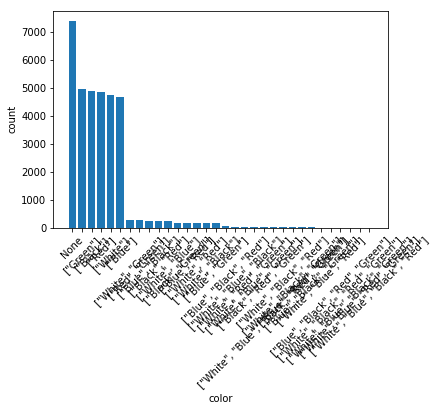

In [185]:
results.bar();

In [197]:
df2 = pd.DataFrame(results, columns=['a', 'b'])

In [200]:
plt.figure();

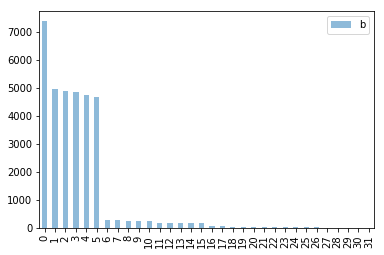

In [203]:
df2.plot(kind='bar', alpha=0.5)